In [11]:
# Loading in standard packages for analysis
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Loading in the corrupted dataset to be used in analysis and imputation
hc_path = 'https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv'
houses_corrupted = pd.read_csv(hc_path, header=0)

# Remove an artifact from the dataset
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True)

## 1.Data Understanding

- The first aim is to gain an overview of the data

In [2]:
houses_corrupted.shape

(20640, 9)

Starting simple we can see that the data set has 9 features & 20,640 observations (rows)

In [3]:
houses_corrupted.head(10)

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,NaN,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,NaN,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
5,269700.0,4.0368,52.0,919.0,213.0,413.0,193.0,37.85,-122.25
6,299200.0,3.6591,52.0,2535.0,489.0,1094.0,514.0,37.84,-122.25
7,241400.0,3.1200,52.0,3104.0,687.0,1157.0,647.0,37.84,-122.25
8,226700.0,2.0804,42.0,2555.0,665.0,1206.0,595.0,37.84,-122.26
9,261100.0,3.6912,52.0,3549.0,707.0,1551.0,714.0,37.84,-122.25


From peeking at the first 10 rows, I can see that:
- All data is quantitative
    - 6 features are discrete, whilst the other 3 are continuous
- Population has missing values

From a more descriptive perspective, we can see that the data set lists certain housing information (median value, median income, median age etc) for specific geographical locations using their coordinates on a map (latitude and longitude).

NOTE: Median income appears to refer to the median hourly wage as opposed to yearly salary


In [4]:
houses_corrupted.tail(10)

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
20630,112000.0,3.5673,11.0,2640.0,505.0,1257.0,445.0,39.29,-121.32
20631,107200.0,3.5179,15.0,2655.0,493.0,1200.0,432.0,39.33,-121.40
20632,115600.0,3.1250,15.0,2319.0,416.0,1047.0,385.0,39.26,-121.45
20633,98300.0,2.5495,27.0,2080.0,412.0,1082.0,382.0,39.19,-121.53
20634,116800.0,3.7125,NaN,2332.0,395.0,1041.0,344.0,39.27,-121.56
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,NaN,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32
20639,89400.0,2.3886,16.0,2785.0,616.0,1387.0,530.0,39.37,-121.24


By looking at the tail we can also see that housing_median_age has missing values. That's 2 features so far with missing values, so it's worth thoroughly checking all features for missing values.

In [5]:
houses_corrupted.isnull().sum()

median_house_value       0
median_income         2064
housing_median_age    2064
total_rooms              0
total_bedrooms           0
population            2064
households               0
latitude                 0
longitude                0
dtype: int64

We can see that there are three features with missing values, median_income, housing_median_age and population.

Each feature is equally missing 2064 values (10% of their records are missing)

Lets continue with an overview of the statistics:

In [6]:
houses_corrupted.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,18576.000000,18576.000000,20640.000000,20640.000000,18576.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.929958,28.324182,2635.763081,537.898014,1488.069283,499.539680,35.631861,-119.569704
std,115395.615874,1.964296,12.584914,2181.615252,421.247906,1170.585810,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.560300,18.000000,1447.750000,295.000000,839.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.572400,28.000000,2127.000000,435.000000,1227.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.870050,37.000000,3148.000000,647.000000,1803.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


In [7]:
duplicatedcount = int(houses_corrupted.duplicated().sum())

print(duplicatedcount)


0


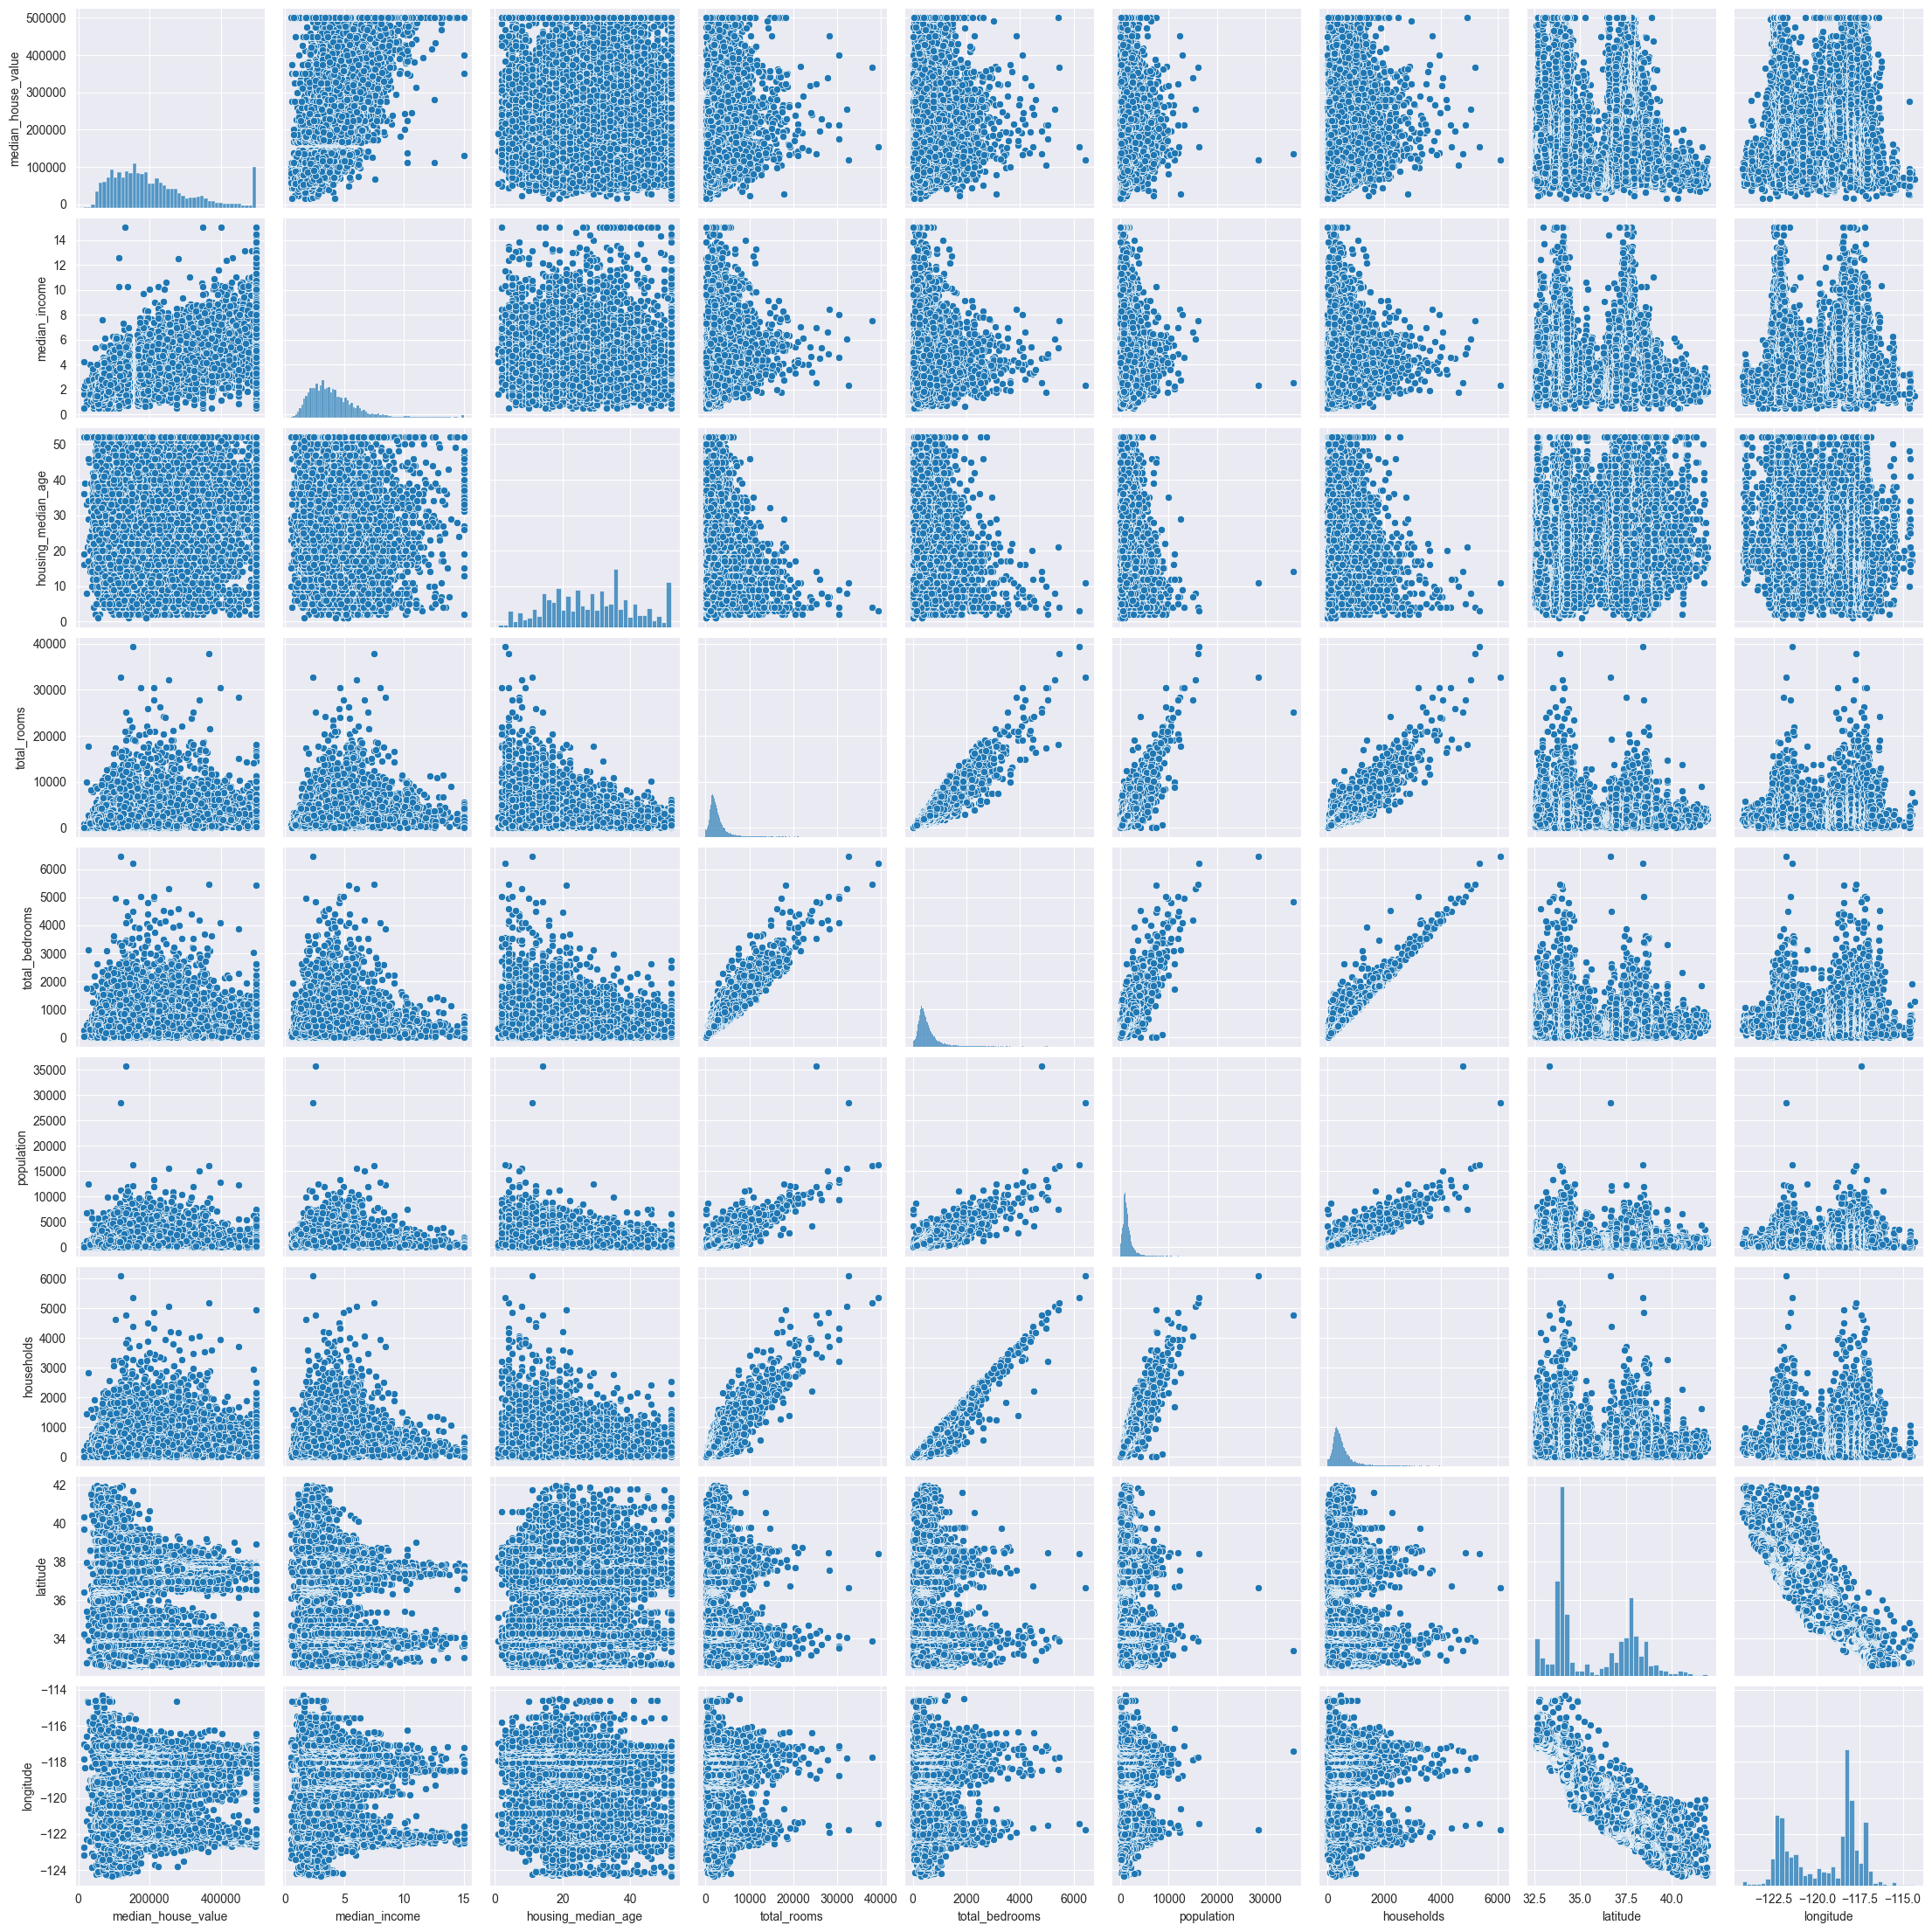

In [8]:
sns.pairplot(houses_corrupted)

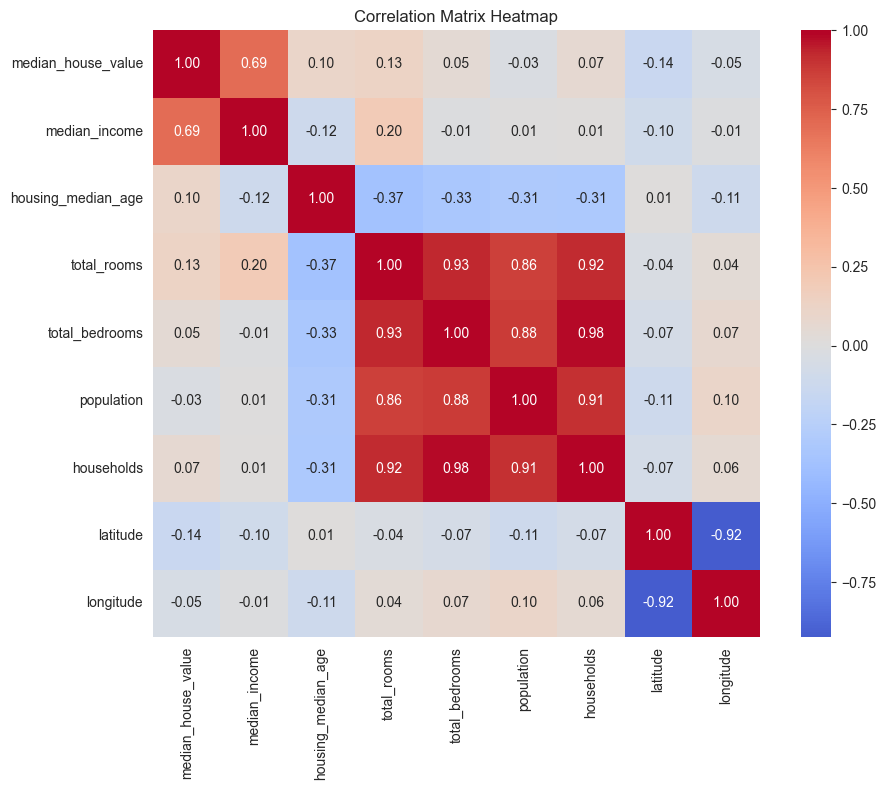

Top correlations:
households          total_bedrooms        0.979829
total_bedrooms      total_rooms           0.929893
longitude           latitude             -0.924664
households          total_rooms           0.918484
population          households            0.907096
total_bedrooms      population            0.877178
population          total_rooms           0.857515
median_income       median_house_value    0.694887
total_rooms         housing_median_age   -0.372323
housing_median_age  total_bedrooms       -0.329757
dtype: float64


In [12]:
# Calculate correlation matrix
corr_matrix = houses_corrupted.corr()

# Visualize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Get top correlations (absolute value)
corr_pairs = corr_matrix.unstack().sort_values(key=abs, ascending=False)
# Remove self-correlations and duplicates
corr_pairs = corr_pairs[corr_pairs != 1.0].drop_duplicates()
print("Top correlations:")
print(corr_pairs.head(10))

- Here we can see that households, total_bedrooms,total_rooms and population are all highly correlated. This is useful to note, as later down the line when we want to train our regression model, it might be worth creating some composite features out of them to aid in interpretability and help the model generalise better.

- Applying some real world context, houses that have more rooms are more likely to have more bedrooms as a bedroom itself is a room. Therefore, these features might be measuring the same underlying latent concept e.g the rough size of a household. We can also see that population and households are strongly positively correlated, which makes sense in the real world as a higher number of people in an area would probably mean more occupied houses. If we honed in on specific areas and this correlation wasn't as strong, high population but not as high households as expected, this could perhaps suggest higher levels of homelessness in area or high household occupancy, both potential indicators of a more deprived area (a feature that could be useful in predicting median house value)

- We can also see that longitude & latitude have a strong negative correlation. The fact that they have a strong correlation, tells us that this is specific geogrpahical area and not random points all over the world. The negative part tells us that as the points move east, they tend to move south. Considering this insight with the min/max values for long and lat, with google we can quickly find out that this is a housing dataset for the state of California in the US.

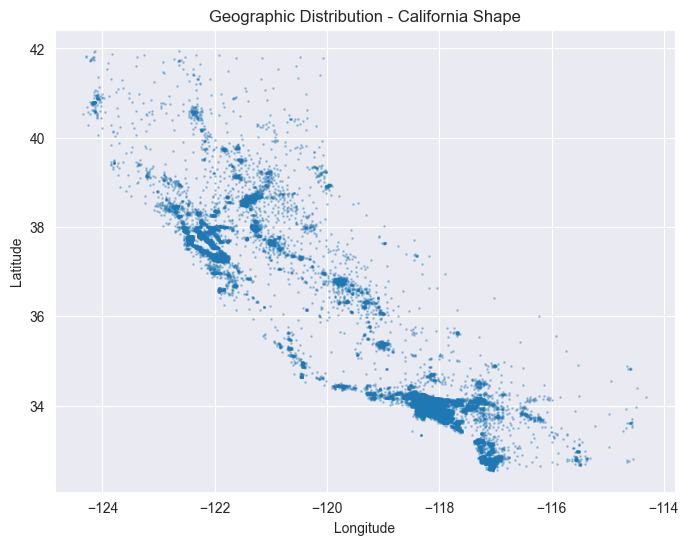

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(houses_corrupted['longitude'], houses_corrupted['latitude'], alpha=0.3, s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution - California Shape')
plt.show()

This scatter plot helps us confirm our insight of the dataset representing California, with the points closely resembling its shape and areas of high density being cities e.g. -118, 34 is probably Los Angeles and -122,38 will be around San Francisco.

This would be a very important insight for the feature engineering process, as although longitude and latitude on their own are not useful in predicting median house value, we could use a clustering algorithm and real world knowledge to translate these coordinates into meaningful property market concepts.

